In [1]:
%cd "../.."

/home/ensai/projet-statistique-2022


In [2]:
from gensim import models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import json
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.mixture import GaussianMixture as GMM
from sklearn.manifold import TSNE

import seaborn as sns
import plotly.express as px


from word_embedding.distance_wmd import *
import doc_embedding.moyenne as moyenne
from reduction_dim.correlation_matrix import *
import clustering.fit_clustering as CL 

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set(font_scale=2)
sns.set_style("darkgrid")
meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"black","markersize":"10"}

In [3]:
df_clustering = pd.read_csv("data/tuning/clustering/gmm.csv",sep=";")
df_clustering["DocEmbedding"] = df_clustering["docEmbedding"] +" - " + df_clustering["docEmbedding2"]
df_clustering = df_clustering.sort_values("DocEmbedding")
df_clustering["Type Clustering"] = np.where(df_clustering["perplexity"].isna(),"Sans tSNE","Avec tSNE")
df_clustering = df_clustering[df_clustering["K"] >= 5]
df_clustering.head()

,K,covariance,silhouette,Cal-Harabasz,BIC,DBCV,perplexity,wordEmbedding,docEmbedding,docEmbedding2,DocEmbedding,Type Clustering
0,7,full,0.013844,2461.600641,-113284.663790,-0.801039,NaN,cbow,Moyenne,TF,Moyenne - TF,Sans tSNE
2559,14,tied,0.370971,10641.269265,179843.896297,-0.620016,75.0,skipgram,Moyenne,TF,Moyenne - TF,Avec tSNE
2560,12,diag,0.343873,9441.755945,179924.363242,-0.611472,75.0,skipgram,Moyenne,TF,Moyenne - TF,Avec tSNE
2561,12,spherical,0.374166,10442.627571,179937.748839,-0.578041,75.0,skipgram,Moyenne,TF,Moyenne - TF,Avec tSNE
2562,13,tied,0.378836,10646.395397,179997.874426,-0.612693,75.0,skipgram,Moyenne,TF,Moyenne - TF,Avec tSNE


Text(0.5, 0.98, "Comparaison des métriques d'evaluation de Clustering")

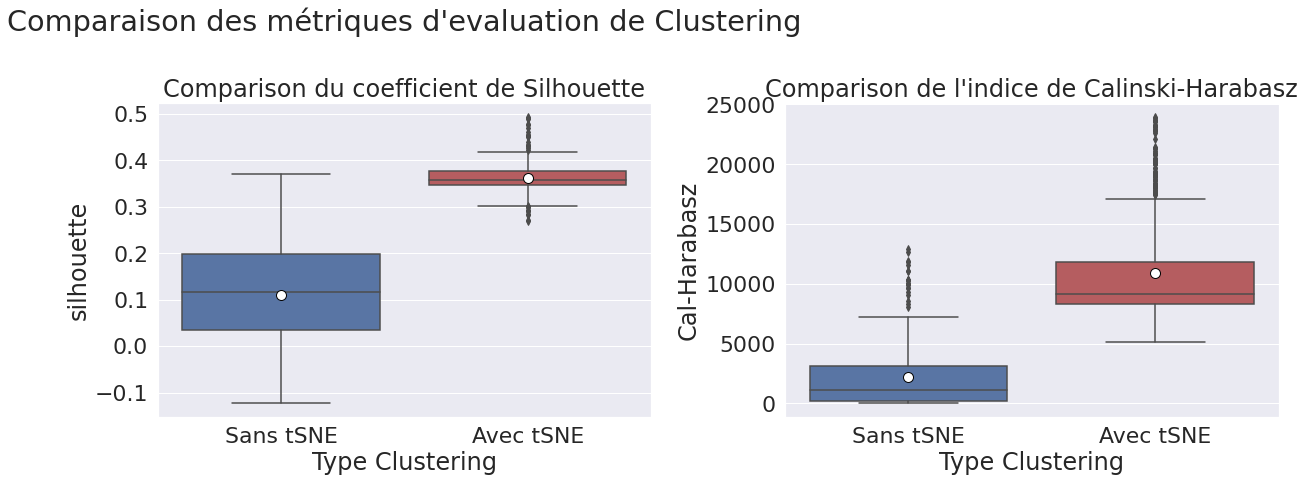

In [4]:
plt.figure(figsize = (25,7),tight_layout=True)
my_pal = {"Sans tSNE":"b","Avec tSNE":"r"}

sns.boxplot(data=df_clustering.iloc[np.where(np.logical_or(df_clustering["perplexity"].isna(),df_clustering["perplexity"]==200))],y="silhouette",x="Type Clustering",palette={"Sans tSNE":"b","Avec tSNE":"r"},
    showmeans=True,meanprops=meanprops,ax=plt.subplot(1,3,2,title="Comparison du coefficient de Silhouette"))
sns.boxplot(data=df_clustering.iloc[np.where(np.logical_or(df_clustering["perplexity"].isna(),df_clustering["perplexity"]==200))],y="Cal-Harabasz",x="Type Clustering",palette={"Sans tSNE":"b","Avec tSNE":"r"},
    showmeans=True,meanprops=meanprops,ax=plt.subplot(1,3,3,title="Comparison de l'indice de Calinski-Harabasz"))

plt.suptitle("Comparaison des métriques d'evaluation de Clustering")

In [5]:
df_clustering = df_clustering[df_clustering["perplexity"] == 200]

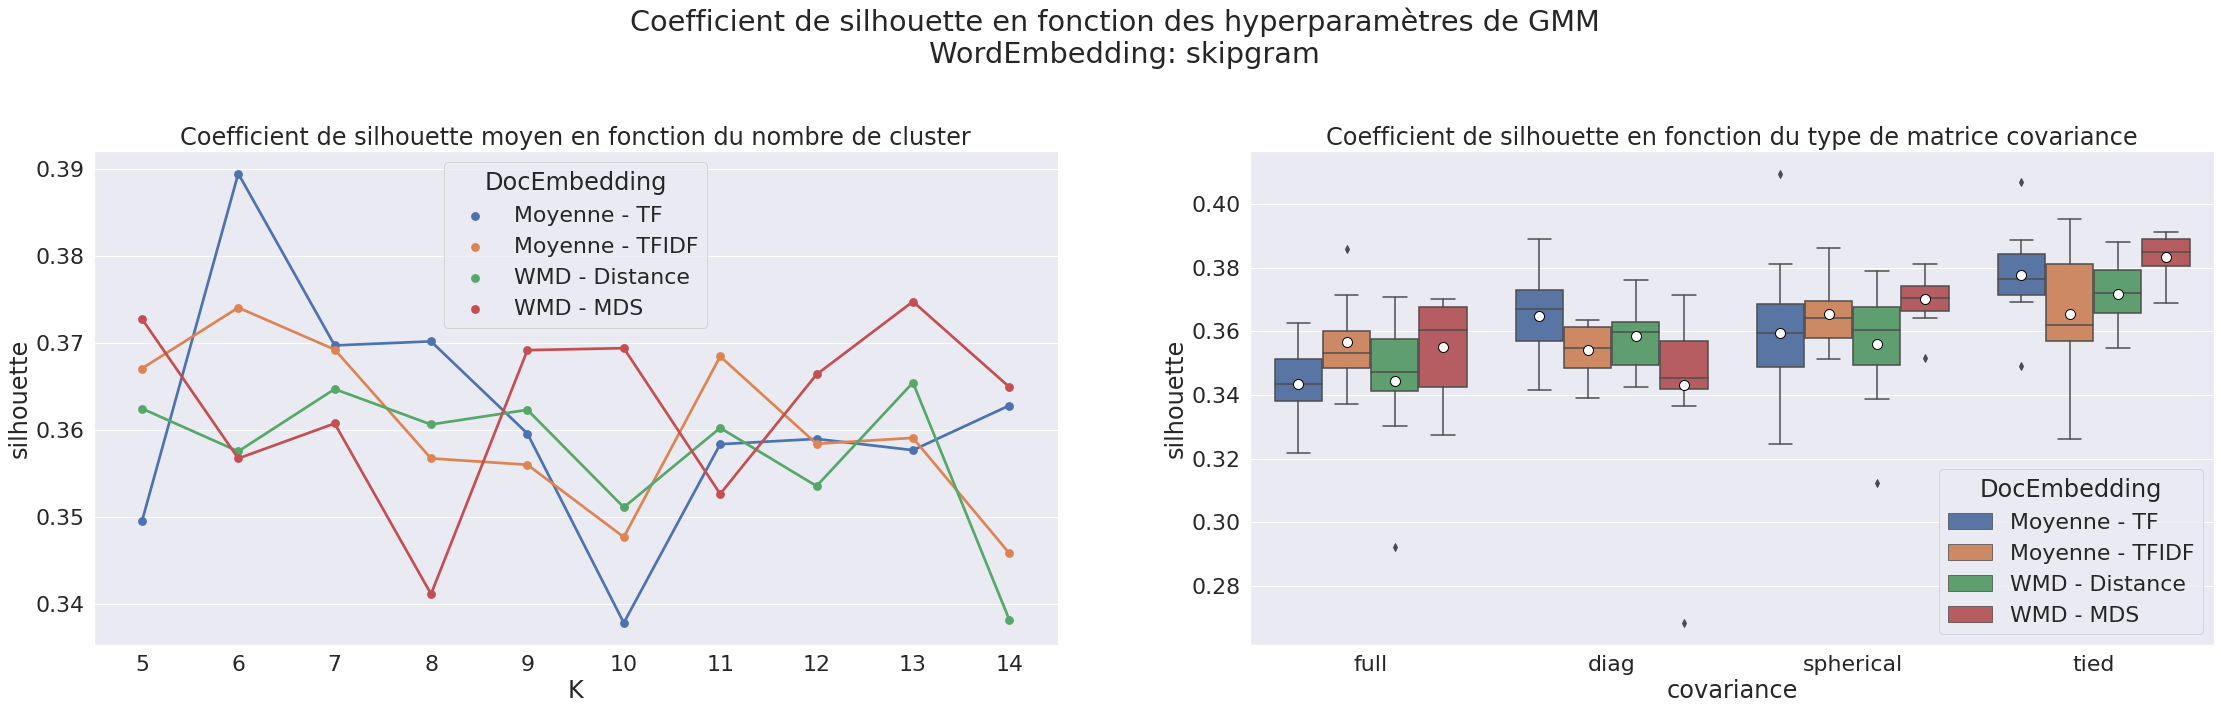

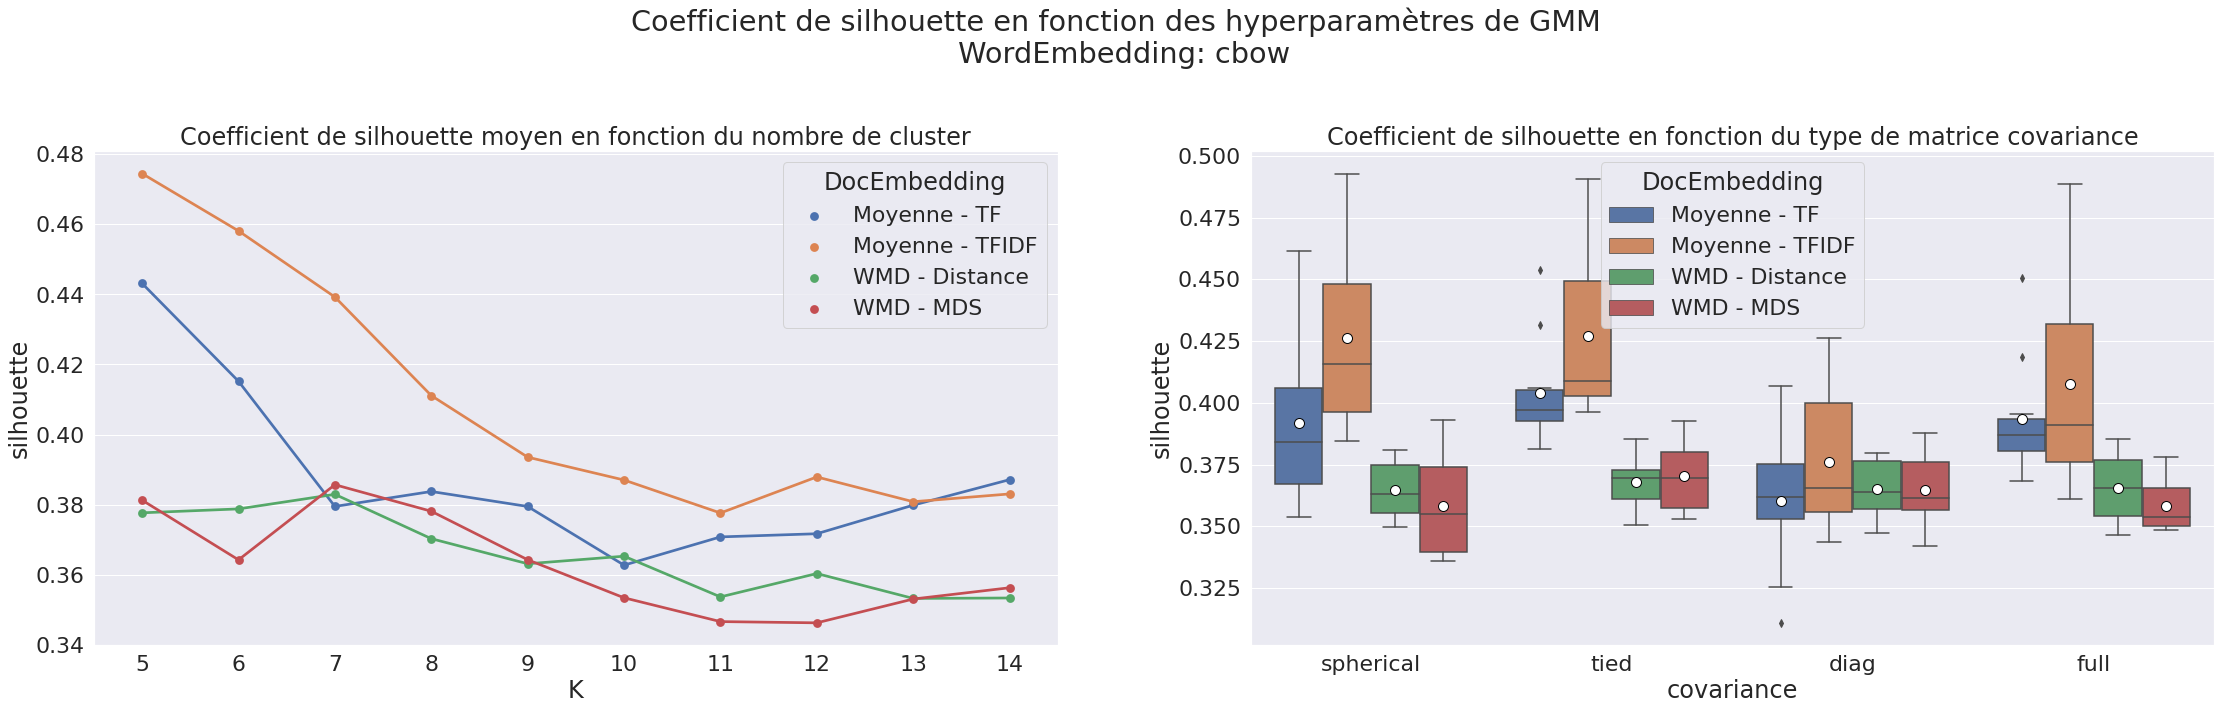

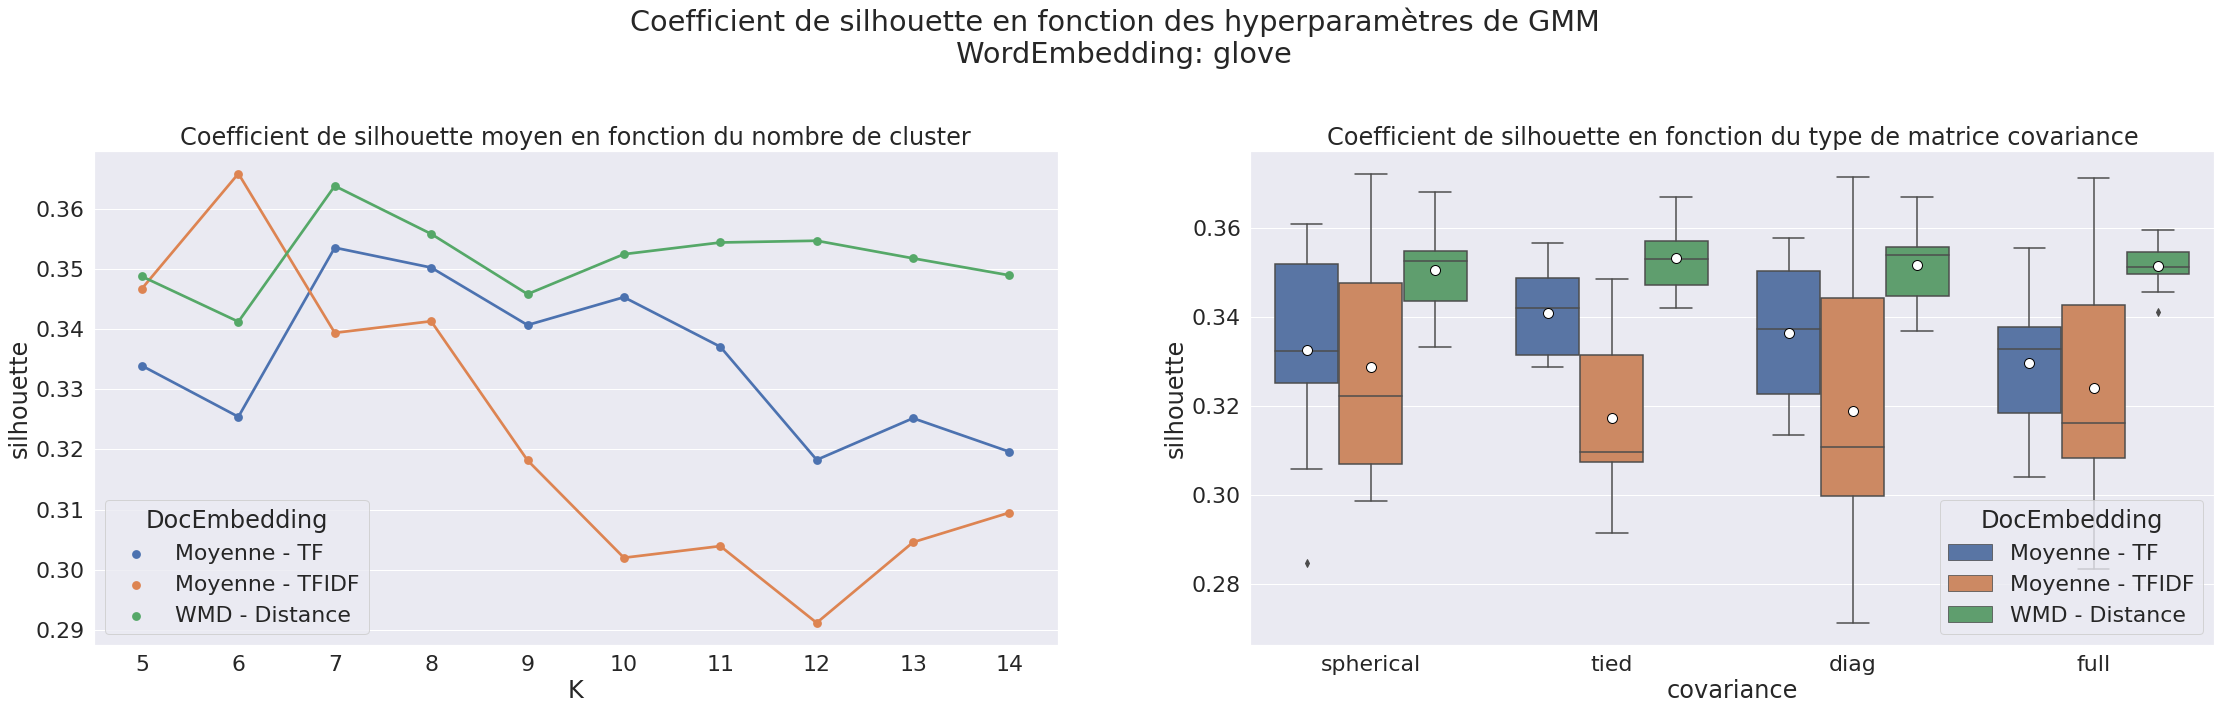

In [7]:
for modele in ["skipgram","cbow","glove"]:
    plt.figure(figsize = (38,20))

    sns.pointplot(data=df_clustering[df_clustering["wordEmbedding"]==modele],y="silhouette",x="K",hue="DocEmbedding",ci=None,
        ax=plt.subplot(2,2,1,title=f"Coefficient de silhouette moyen en fonction du nombre de cluster"))

    sns.boxplot(data=df_clustering[df_clustering["wordEmbedding"]==modele],y="silhouette",x="covariance",hue="DocEmbedding",showmeans=True,meanprops=meanprops,
        ax=plt.subplot(2,2,2,title=f"Coefficient de silhouette en fonction du type de matrice covariance"))

    plt.suptitle(f"Coefficient de silhouette en fonction des hyperparamètres de GMM \n WordEmbedding: {modele}")
    plt.show()

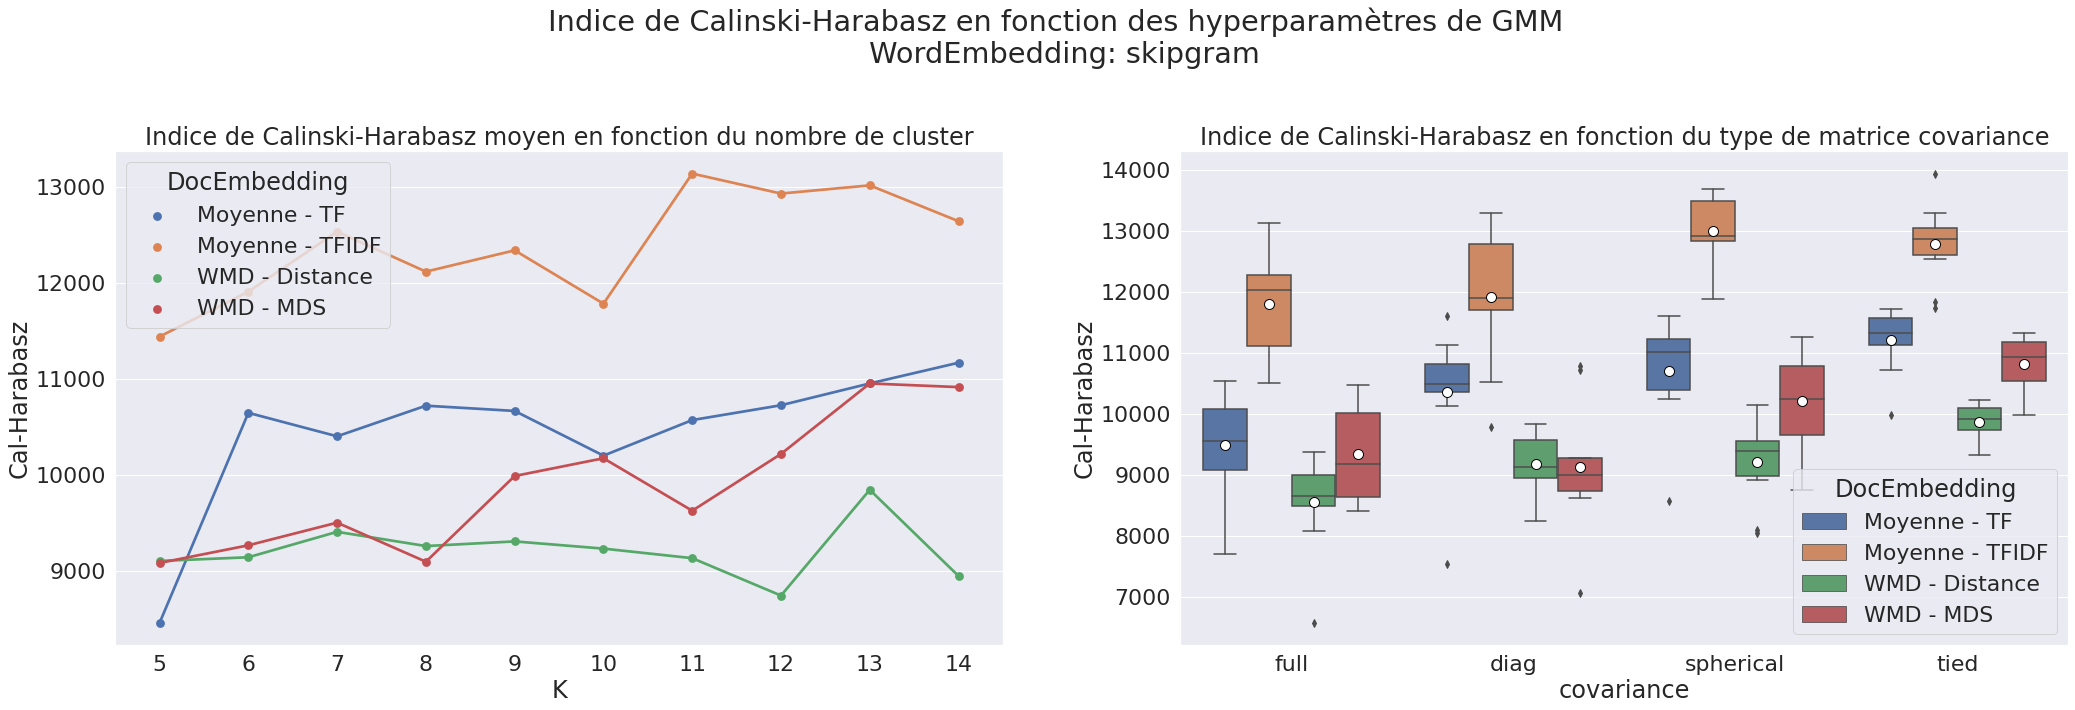

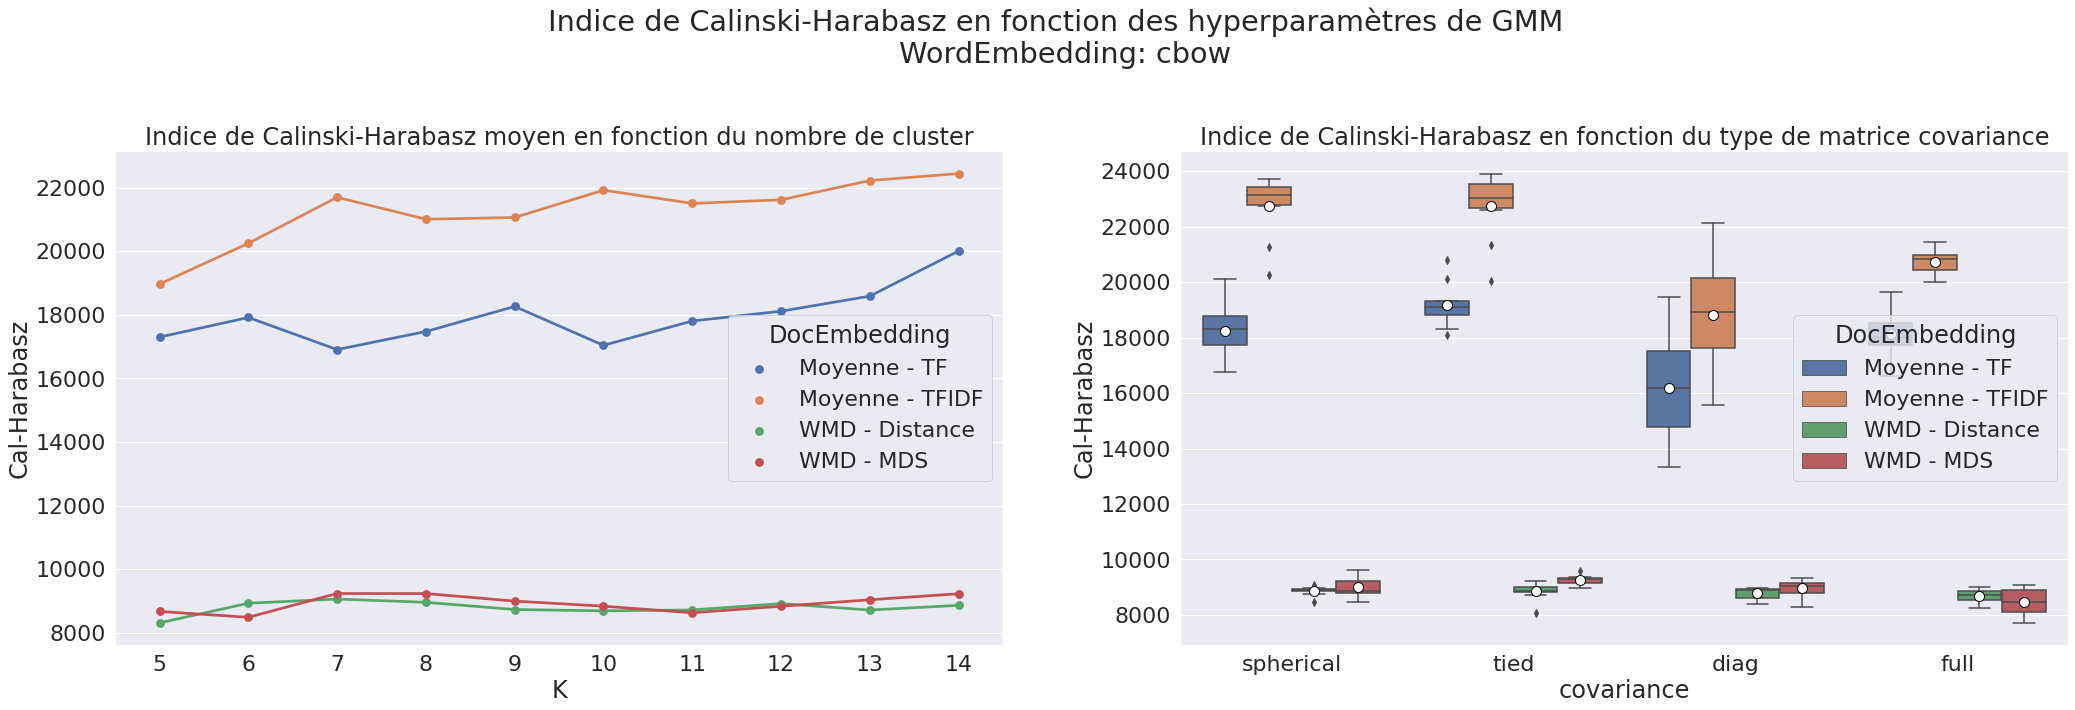

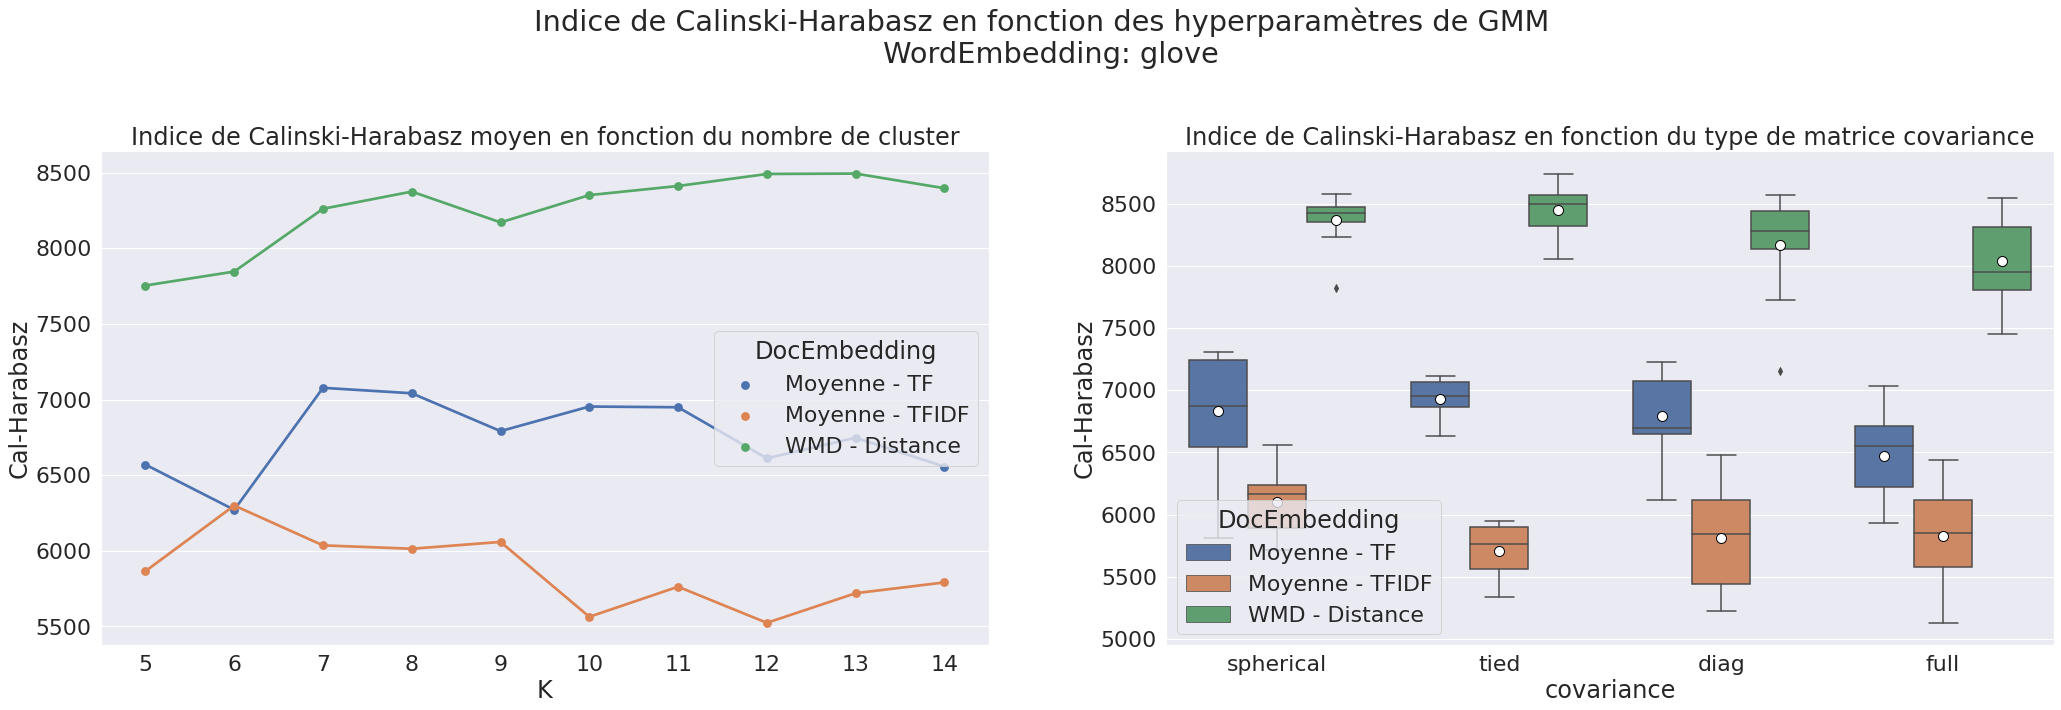

In [8]:
for modele in ["skipgram","cbow","glove"]:
    plt.figure(figsize = (35,20))

    sns.pointplot(data=df_clustering[df_clustering["wordEmbedding"]==modele],y="Cal-Harabasz",x="K",hue="DocEmbedding",ci=None,
        ax=plt.subplot(2,2,1,title=f"Indice de Calinski-Harabasz moyen en fonction du nombre de cluster"))

    sns.boxplot(data=df_clustering[df_clustering["wordEmbedding"]==modele],y="Cal-Harabasz",x="covariance",hue="DocEmbedding",showmeans=True,meanprops=meanprops,
        ax=plt.subplot(2,2,2,title=f"Indice de Calinski-Harabasz en fonction du type de matrice covariance"))

    plt.suptitle(f"Indice de Calinski-Harabasz en fonction des hyperparamètres de GMM \n WordEmbedding: {modele}")
    plt.show()

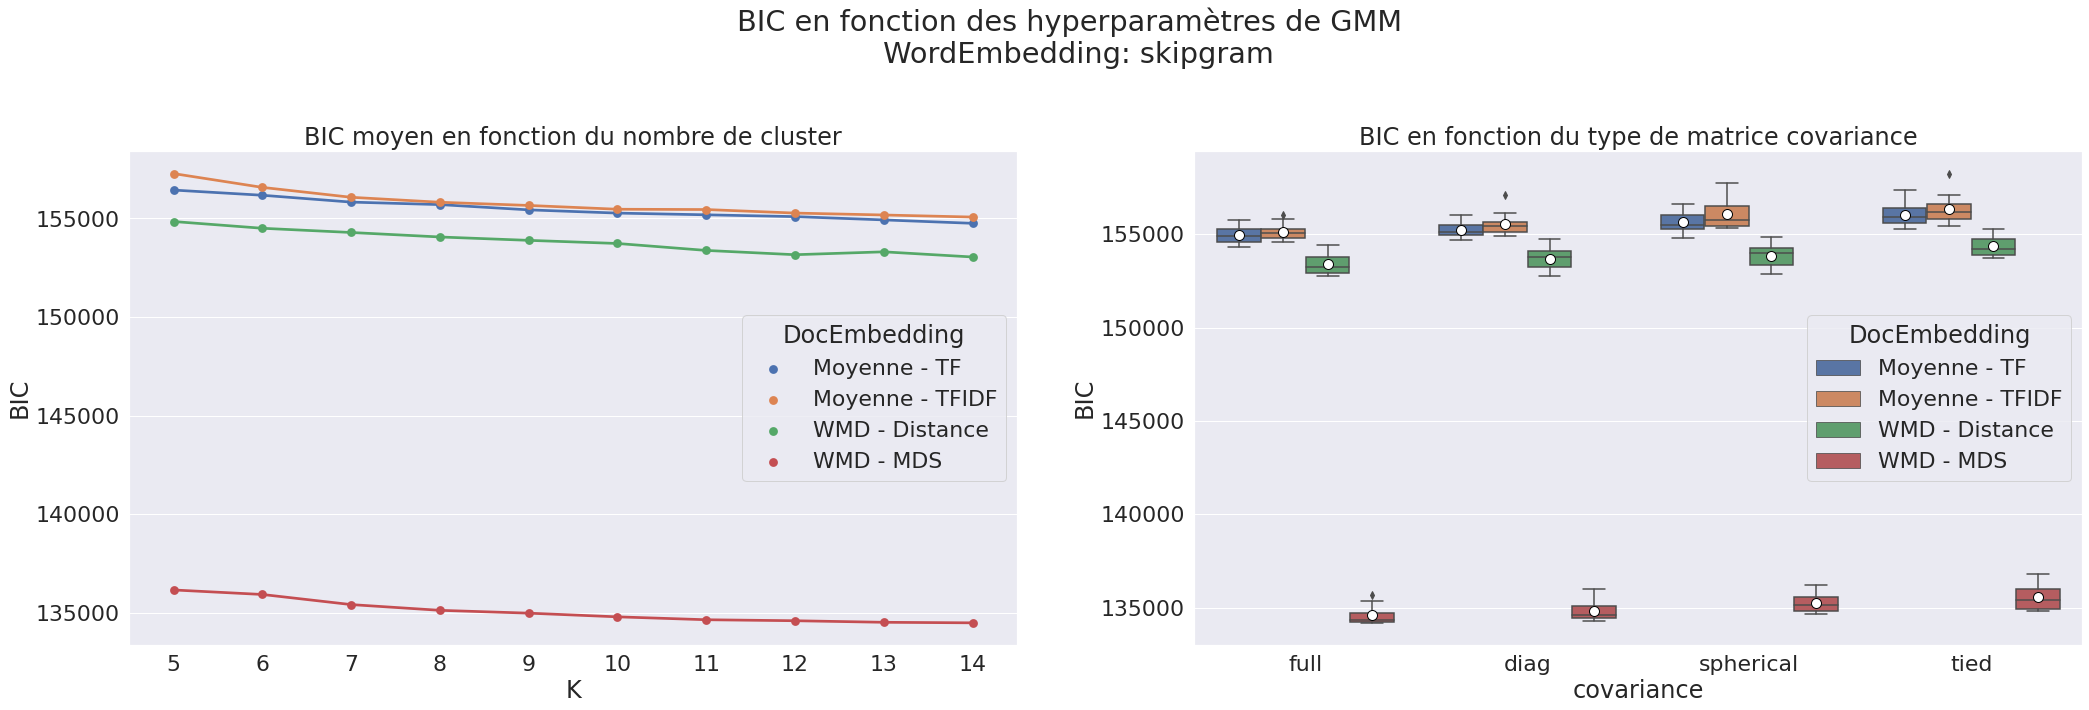

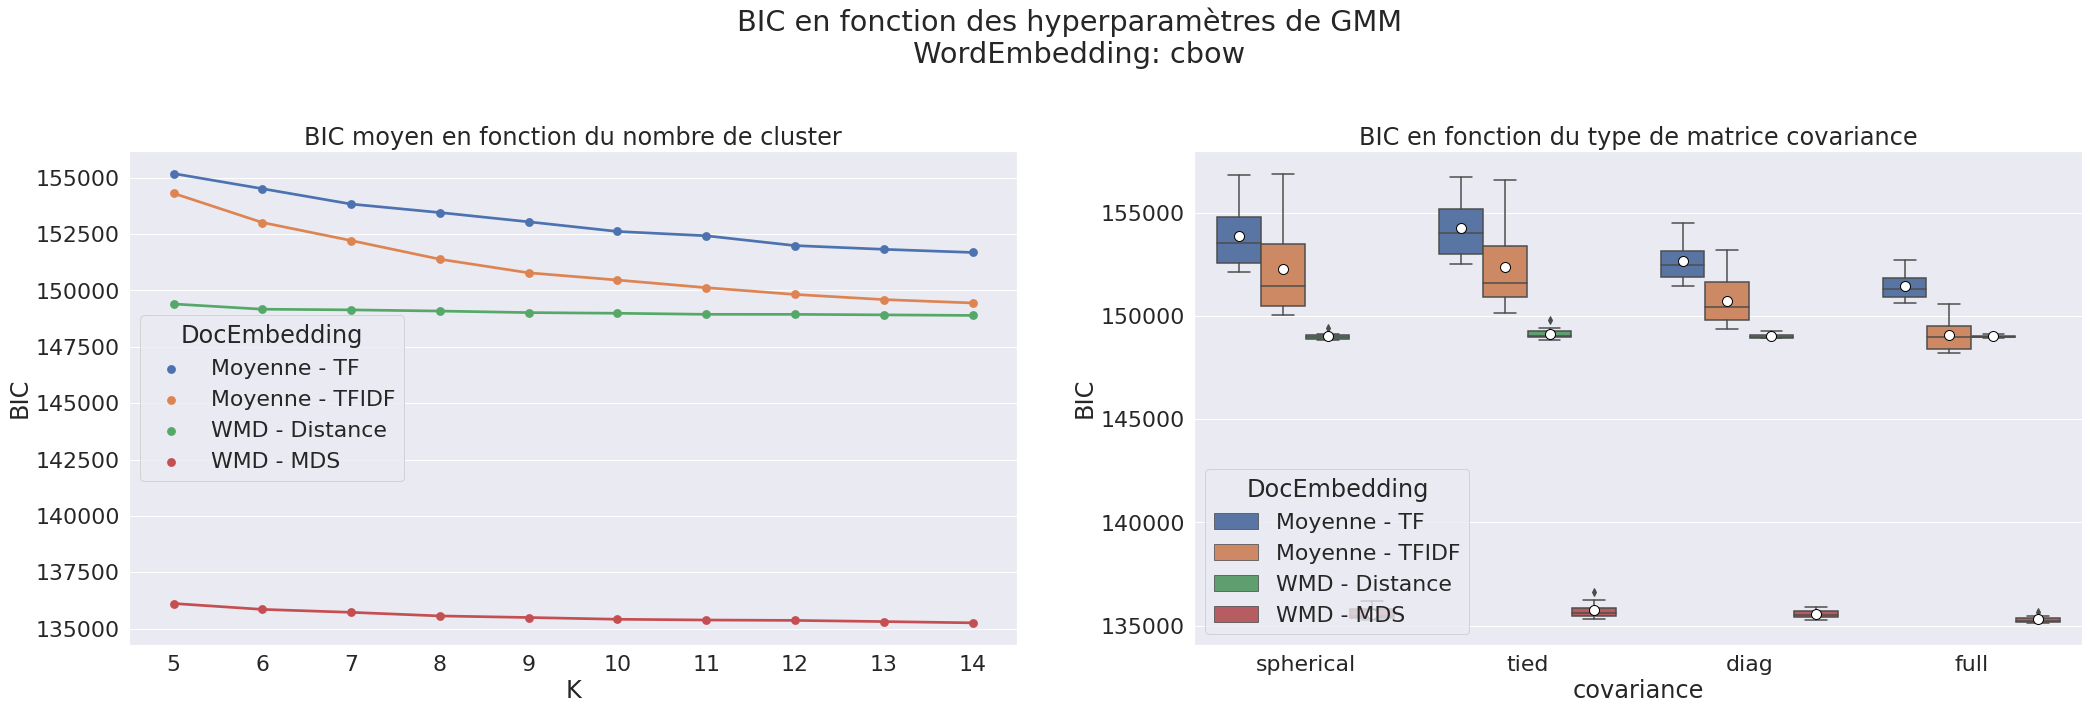

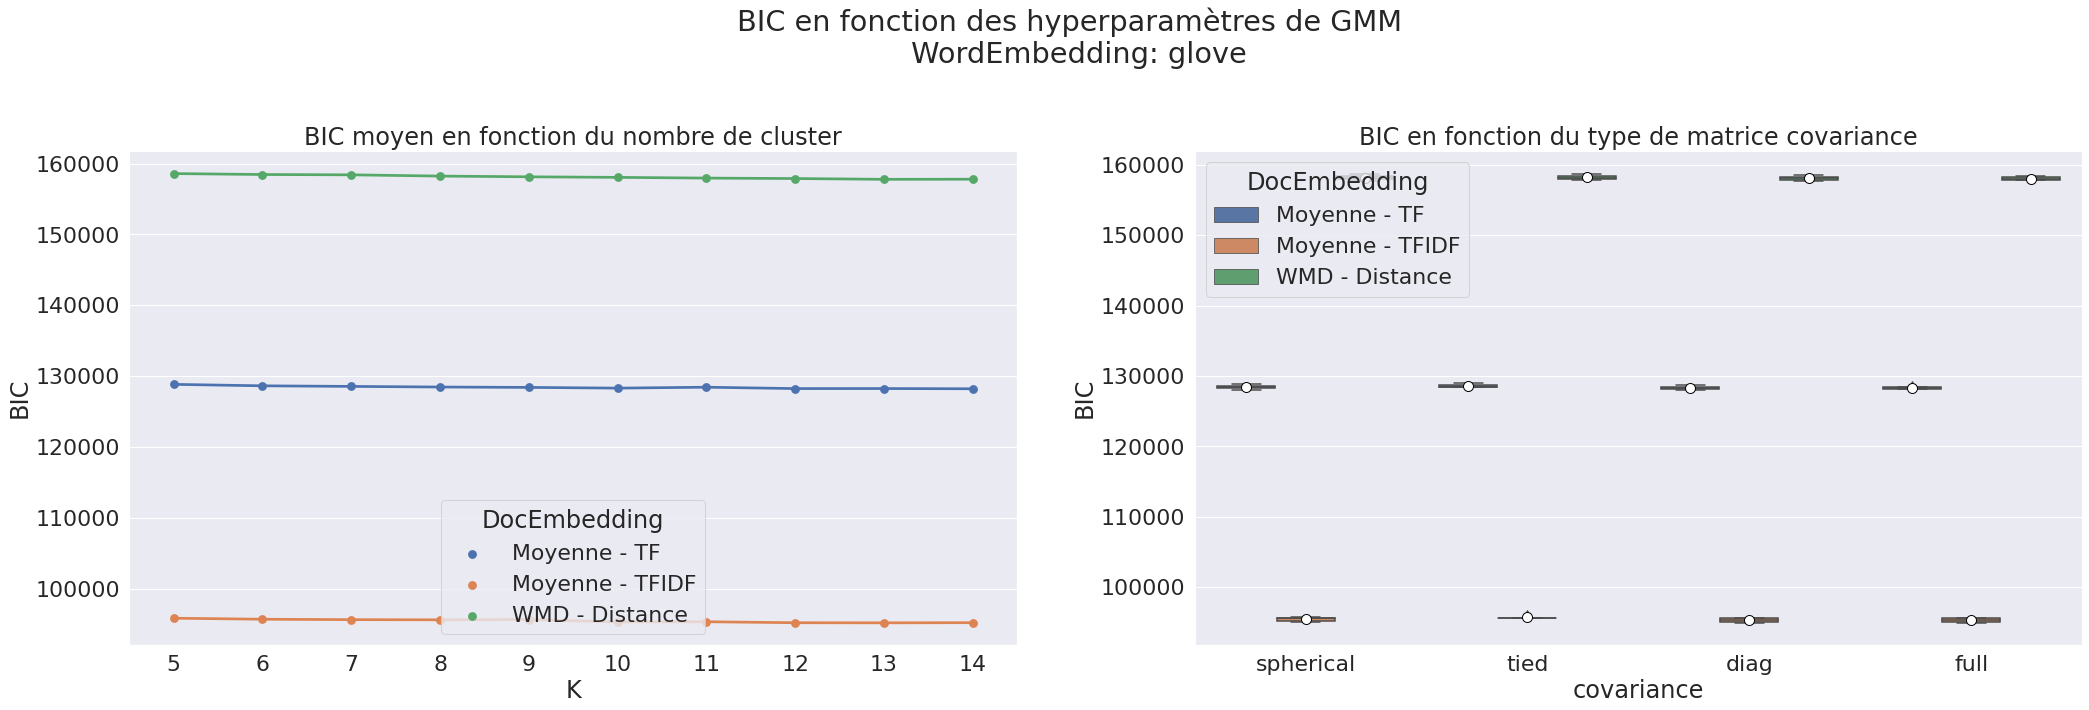

In [10]:
for modele in ["skipgram","cbow","glove"]:
    plt.figure(figsize = (35,20))

    sns.pointplot(data=df_clustering[df_clustering["wordEmbedding"]==modele],y="BIC",x="K",hue="DocEmbedding",ci=None,
        ax=plt.subplot(2,2,1,title=f"BIC moyen en fonction du nombre de cluster"))

    sns.boxplot(data=df_clustering[df_clustering["wordEmbedding"]==modele],y="BIC",x="covariance",hue="DocEmbedding",showmeans=True,meanprops=meanprops,
        ax=plt.subplot(2,2,2,title=f"BIC en fonction du type de matrice covariance"))

    plt.suptitle(f"BIC en fonction des hyperparamètres de GMM \n WordEmbedding: {modele}")
    plt.show()